In [14]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
#Look at first row of each dataset to determine column names
measurements_first = session.query(Measurement).first()
measurements_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe0a525a518>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [23]:
#Look at first row of each dataset to determine column names\
stations_first = session.query(Station).first()
stations_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe0a525ac88>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [25]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurement.date)).all()

#Get object as a string
max_date = [date[0] for date in max_date]
max_date = max_date[0]

#Split string so that date can be inserted into a datetime()
max_date = max_date.split('-')

max_date

['2017', '08', '23']

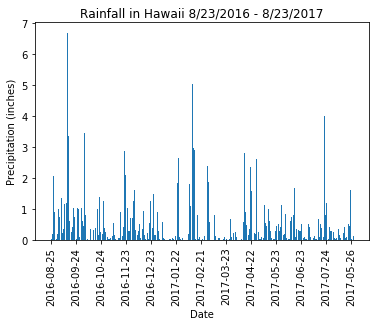

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
min_date = dt.datetime(int(max_date[0])-1, int(max_date[1]), int(max_date[2]))


# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > min_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns=['date', 'precip'])

precip_df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precip_df.index.values, precip_df['precip'])

plt.xticks(np.arange(1, 365, step=30), rotation=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Rainfall in Hawaii 8/23/2016 - 8/23/2017')

plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
stations = list(session.query(Station.station).distinct())

station_count = len(stations)

station_count

9

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_counts = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

stations_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_station = 'USC00519281'

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == max_station).all()

lowest_temp

[(54.0)]

In [31]:
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == max_station).all()

highest_temp

[(85.0)]

In [35]:
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == max_station).all()

avg_temp

[(71.66378066378067)]

Text(0, 0.5, 'Obsevarion Count')

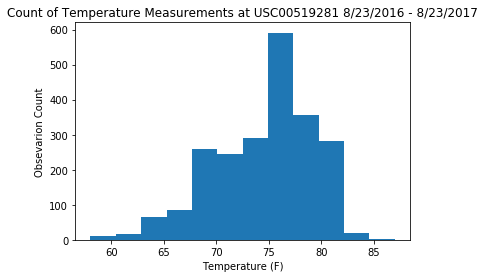

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).filter(Measurement.date > min_date).all()

#Unpack tuples into a list
temps_list = [value for value, in temps]

#plot histogram and add titles, labels, etc
plt.hist(temps_list, bins=12)
plt.title(f'Count of Temperature Measurements at {max_station} 8/23/2016 - 8/23/2017')
plt.xlabel('Temperature (F)')
plt.ylabel("Obsevarion Count")

# Close session

In [45]:
# Close Session
session.close()